## Debug notebook for the Dynamical Anomaly generative model

In [10]:
import yaml

import tools_temp as tlm
import Dyn_ACD_gm as gm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import importlib 
%matplotlib inline

In [11]:
with open('setting_syn_data.yaml') as f:
    conf = yaml.load(f, Loader=yaml.FullLoader)

# conf

In [12]:
conf['N'] = 100
conf['K'] = 2
conf['T'] = 5
conf['avg_degree'] = 5.
conf['verbose'] = 2
conf['beta'] = 0.2
conf['pi'] = 0.2 
conf['ell'] = 0.2 
conf['folder'] = '../data/input/synthetic/100_5/' 

### Run for many seeds and eta

In [13]:
importlib.reload(gm)
importlib.reload(tlm)

<module 'tools_temp' from '/Users/hasafdari/Downloads/WORK/GitHub/DynACD/code/tools_temp.py'>

------------------------------------------------------------------
rseed: 0
seed, rho_anomaly: 0 0.2
------------------------------
Filename = 100_2_5.0_5_0.2_2_2_0.2
self.N : 100
len(A):6
Adjacency matrix saved in:
../data/input/synthetic/100_5/syn_100_2_5.0_5_0.2_2_2_0.2_0.csv.
Removed 0 nodes, because not part of the largest connected component
------------------------------
t = 0
Number of nodes: 100 
Number of edges: 375
Average degree (2E/N): 7.5
Reciprocity at t: 0.08533333333333333
------------------------------
------------------------------
t = 1
Number of nodes: 100 
Number of edges: 376
Average degree (2E/N): 7.52
Reciprocity at t: 0.0797872340425532
------------------------------
------------------------------
t = 2
Number of nodes: 100 
Number of edges: 357
Average degree (2E/N): 7.14
Reciprocity at t: 0.06722689075630252
------------------------------
------------------------------
t = 3
Number of nodes: 100 
Number of edges: 338
Average degree (2E/N): 6.76
Reciprocity a

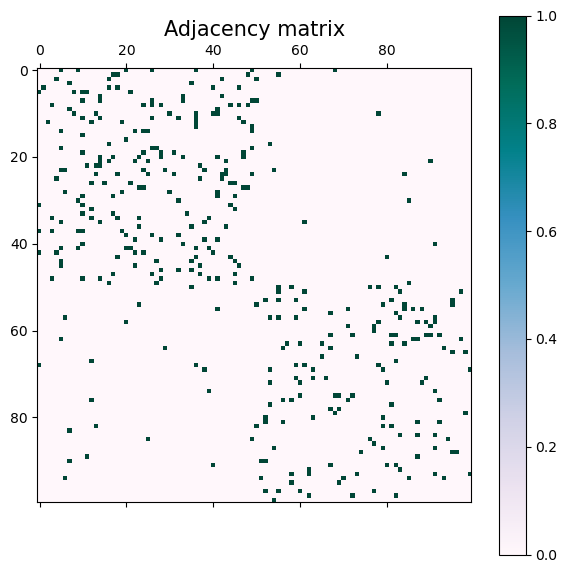

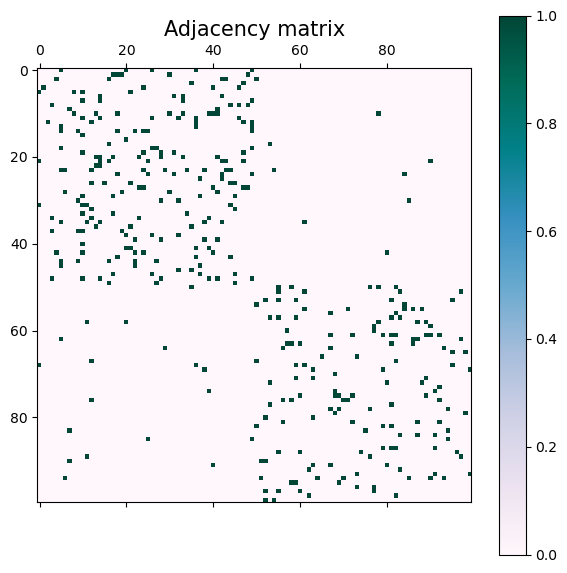

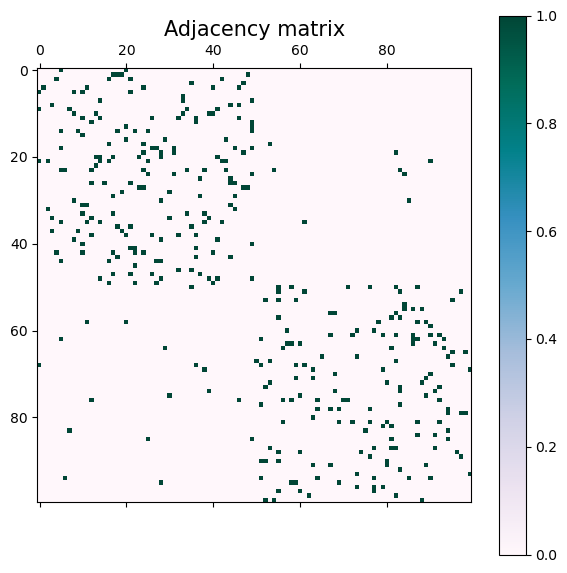

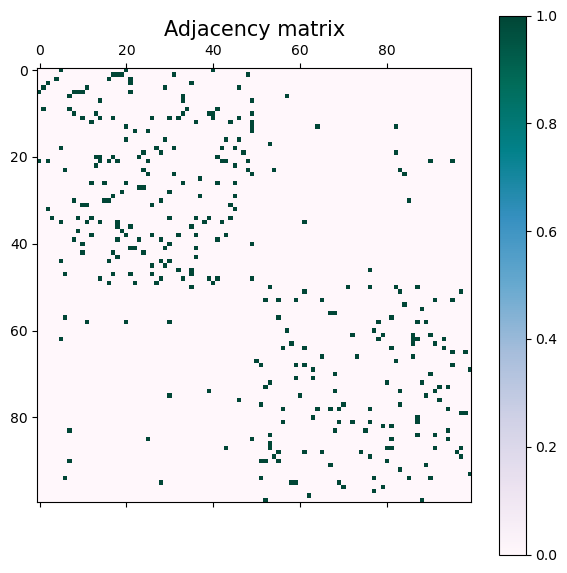

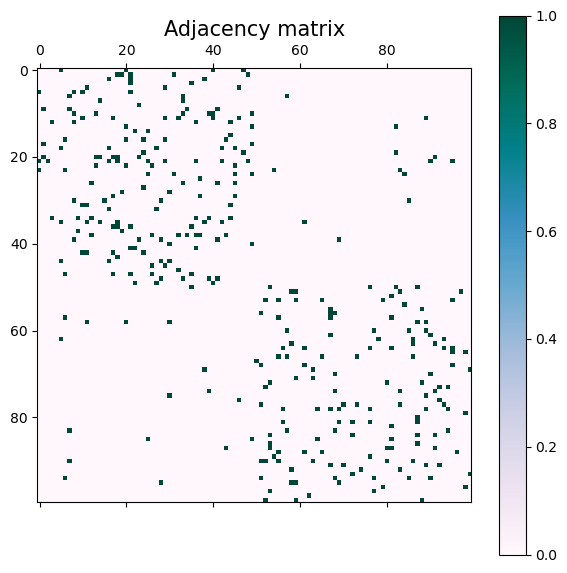

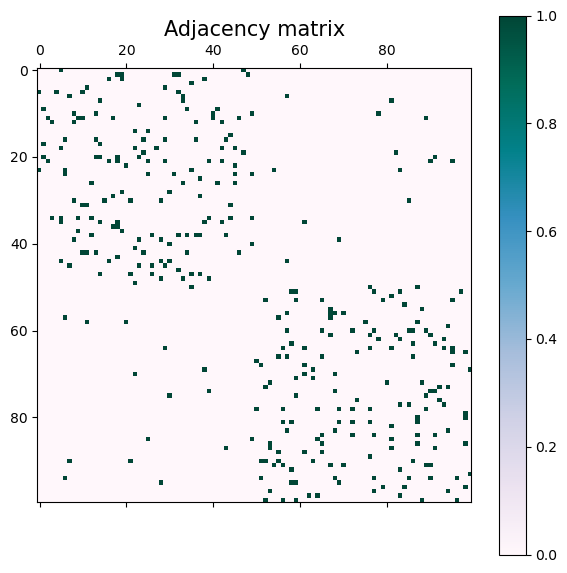

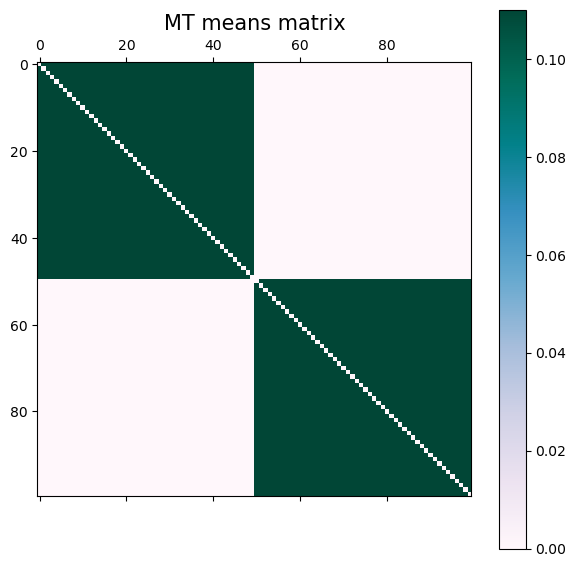



CPU times: user 395 ms, sys: 22.2 ms, total: 417 ms
Wall time: 420 ms


In [14]:
%%time 
rseed = 10
model = {}
for rseed in range(1):
    print('-'*66)
    print('rseed:', rseed) 
    conf['prng'] = rseed 
    for rho_anomaly in [0.2]: 
        conf['rho_anomaly'] = rho_anomaly
        print('seed, rho_anomaly:', rseed, rho_anomaly)
        print('-'*30)   
        gen = gm.SyntNetDynAnomaly(**conf)
        model[rseed] = gen.anomaly_network_PB()

    rseed += 1
    print('\n')


In [15]:
df = pd.read_csv('../data/input/synthetic/100_5/syn_100_2_5.0_5_0.2_2_2_0.2_0.csv')

In [16]:
df

,source,target,weight_t0,weight_t1,weight_t2,weight_t3,weight_t4,weight_t5
0,0,5,1,1,1,1,1,1
1,0,9,1,0,0,0,0,0
2,0,20,1,1,1,1,1,0
3,0,26,1,1,0,0,0,0
4,0,36,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
688,99,54,1,1,1,0,0,0
689,99,56,0,0,0,0,0,1
690,99,59,0,0,0,0,1,1
691,99,88,0,0,1,1,1,1
